In [16]:
import os
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import csv
import pandas as pd
import seaborn as sns
import numpy as np

# from lexical_change1 import get_time_series

In [17]:
ROOT = '/mnt/data0/lucy/manosphere/'
WORD_FILE = ROOT + 'data/ann_sig_entities.csv'
LOGS = ROOT + 'logs/'
TIME_SERIES_DIR = LOGS + 'time_series/'
PLOTS = LOGS + 'plots/'

# Time Series

This notebook visualizes time series for different words in our vocabulary of interest. 

The inputs to this notebook are mainly from `lexical_change.py`. 

In [18]:
words = pd.read_csv(WORD_FILE)

In [4]:
words

,ngram,entity,related_entity,labels,det / poss,total_count,tagged_count,ratio,keep,reason
0,unigram,women,woman,"{""nom_per"": 4732827, ""prop_per"": 2689}","{"""": 4245758, ""all"": 103083, ""the"": 138958, ""a...",6605369,4735516.0,0.716919,Y,NaN
1,unigram,men,man,"{""nom_per"": 2997843, ""prop_per"": 5541}","{"""": 2727020, ""these"": 27717, ""the"": 90381, ""t...",4997436,3003384.0,0.600985,Y,NaN
2,unigram,people,person,"{""nom_per"": 2366727, ""prop_per"": 1109}","{""all"": 15223, """": 2009987, ""some"": 153769, ""t...",4650905,2367836.0,0.509113,Y,NaN
3,unigram,girl,girls,"{""nom_per"": 1434612, ""prop_per"": 3288}","{""a"": 626773, ""the"": 295847, """": 78635, ""this""...",2672802,1437900.0,0.537975,Y,NaN
4,unigram,man,men,"{""nom_per"": 1249340, ""prop_per"": 2377}","{""the"": 152902, ""a"": 589129, ""each"": 2686, ""ev...",2448682,1251717.0,0.511180,Y,NaN
...,...,...,...,...,...,...,...,...,...,...
9097,glossary,observed,NaN,NaN,NaN,18968,NaN,0.002109,N,NaN
9098,glossary,tools,NaN,NaN,NaN,41704,NaN,0.001391,N,NaN
9099,glossary,she,NaN,NaN,NaN,10856459,NaN,0.001328,Y,NaN
9100,glossary,jaw,NaN,NaN,NaN,49317,NaN,0.001196,N,NaN


In [19]:
def month_year_iter(start, end):
    '''
    https://stackoverflow.com/questions/5734438/how-to-create-a-month-iterator
    
    This function differs slightly from the one in lexical_change.py 
    because it converts the string to a datetime date. 
    '''
    start_contents = start.split('-')
    start_month = int(start_contents[1])
    start_year = int(start_contents[0])
    end_contents = end.split('-')
    end_month = int(end_contents[1])
    end_year = int(end_contents[0])
    ym_start= 12*start_year + start_month - 1
    ym_end= 12*end_year + end_month - 1
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        month = str(m + 1)
        if len(month) == 1: 
            month = '0' + month
        str_month_year = str(y) + '-' + month
        yield dt.datetime.strptime(str_month_year,'%Y-%m').date()

def get_time_series_data(dataset, per_doc=True): 
    '''
    Reads in a vocab file and a numpy matrix, where
    each row of the numpy matrix corresponds to the time series for a word.
    The order of rows and words in the vocab file match each other. 
    
    @inputs
    - dataset: str can be either 'manosphere' or 'control'
    '''
    word_list = []
            
    if per_doc: 
        with open(TIME_SERIES_DIR + 'vocab_' + dataset + '_set.txt', 'r') as infile: 
            for line in infile: 
                word_list.append(line.strip())
        matrix = np.load(TIME_SERIES_DIR + 'time_series_' + dataset + '_smoothed_set.npy')
    else:
        with open(TIME_SERIES_DIR + 'vocab_' + dataset + '.txt', 'r') as infile: 
            for line in infile: 
                word_list.append(line.strip())
        matrix = np.load(TIME_SERIES_DIR + 'time_series_' + dataset + '.npy')
    
    time_series_dict = {}
    for i, word in enumerate(word_list): 
        time_series_dict[word] = matrix[i]
    
    min_month = '2005-11'
    max_month = '2019-12'
    months = list(month_year_iter(min_month, max_month))
    
    return time_series_dict, months

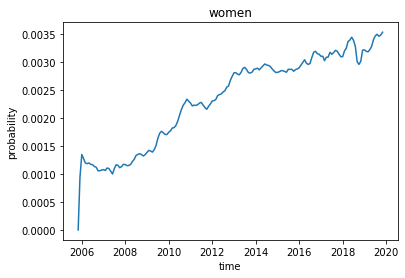

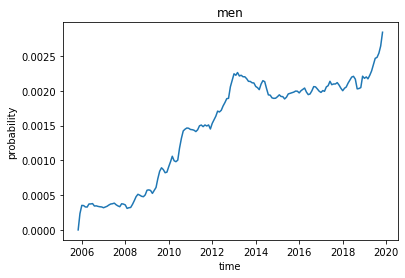

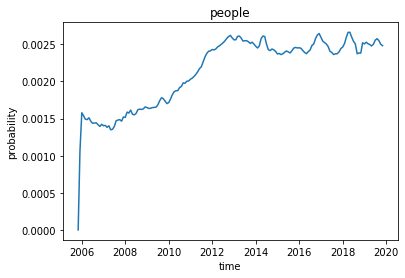

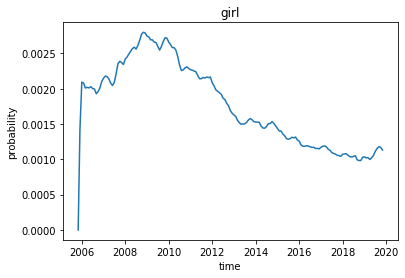

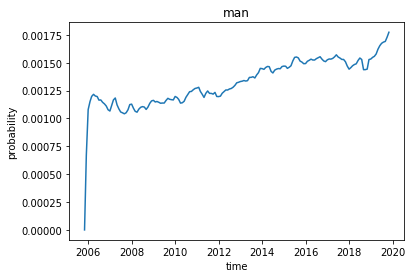

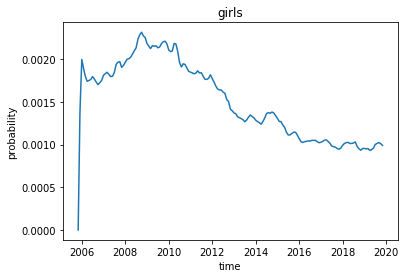

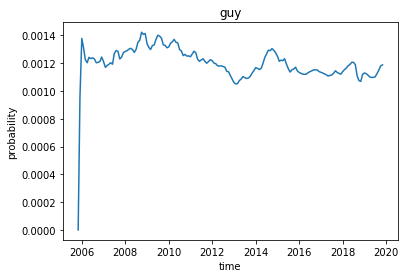

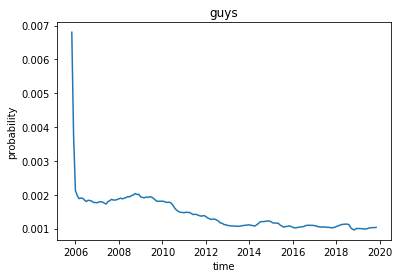

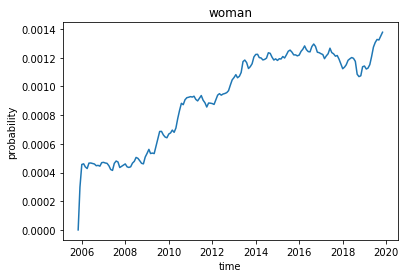

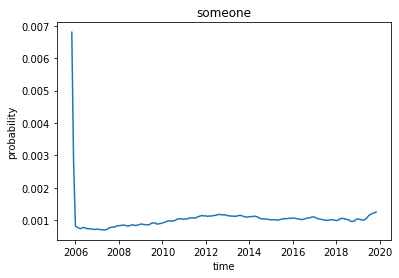

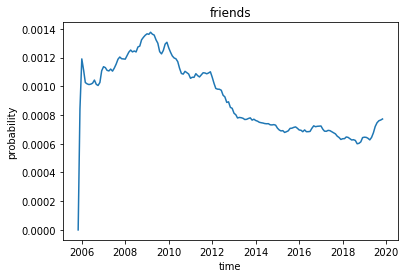

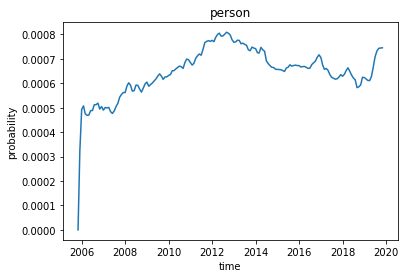

In [21]:
time_series_dict, months = get_time_series_data('manosphere', per_doc=True)
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_manosphere.png')
    plt.show()
    if i > 10: break

In [13]:
time_series_dict, months = get_time_series_data('control', per_doc=True)
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_control.png')
    plt.show()
    if i > 10: break

IndexError: index 200 is out of bounds for axis 0 with size 200

## Investigate time series patterns

In [25]:
# load membership, time series, vocab
word_list = []
with open(TIME_SERIES_DIR + 'vocab_manosphere_set.txt', 'r') as infile: 
        for line in infile: 
            word_list.append(line.strip())
matrix = np.load(TIME_SERIES_DIR + 'time_series_manosphere_smoothed_set.npy')

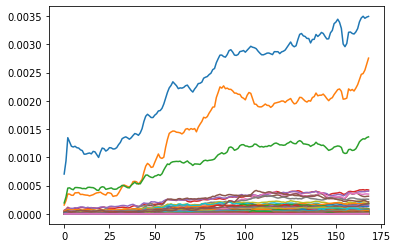

['women', 'men', 'woman', 'kids', 'family', 'children', 'wife', 'op', 'mother', 'father', 'males', 'nobody', 'husband', 'police', 'dad', 'partner', 'population', 'slut', 'bitches', 'humans', 'daughter', 'adult', 'partners', 'doctor', 'mothers', 'sluts', 'wives', 'babies', 'minority', 'cops', 'families', 'user', 'betas', 'idiots', 'teachers', 'americans', 'blacks', 'couples', 'assholes', 'adults', 'president', 'daddy', 'enemy', 'husbands', 'provider', 'doctors', 'therapist', 'asians', 'alphas', 'mod', 'teen', 'sons', 'moms', 'captain', 'teens', 'politicians', 'leaders', 'daughters', 'moron', 'professor', 'peers', 'lawyers', 'employees', 'lord', 'officer', 'household', 'offspring', 'teenager', 'coworkers', 'judges', 'citizens', 'slayer', 'criminals', 'soldiers', 'immigrants', 'engineer', 'gays', 'employee', 'pussies', 'enemies', 'minorities', 'tribe', 'ceo', 'christians', 'fans', 'coworker', 'scientists', 'teenagers', 'mommy', 'conservatives', 'employer', 'introvert', 'officers', 'masses

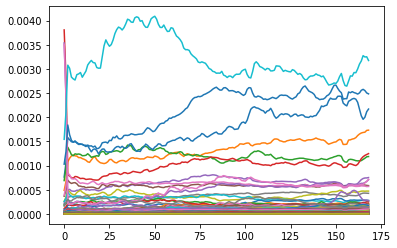

['people', 'man', 'guy', 'someone', 'person', 'everyone', 'anyone', 'others', 'dude', 'group', 'bitch', 'parents', 'girlfriend', 'ex', 'bro', 'kid', 'boys', 'boy', 'mom', 'baby', 'brother', 'dudes', 'son', 'asshole', 'sister', 'idiot', 'somebody', 'everybody', 'team', 'students', 'loser', 'anybody', 'lady', 'ladies', 'teacher', 'boss', 'girlfriends', 'strangers', 'brothers', 'king', 'folks', 'jerk', 'stranger', 'fool', 'creep', 'boyfriends', 'audience', 'hero', 'cousin', 'nerd', 'manager', 'driver', 'cop', 'staff', 'expert', 'princess', 'peoples', 'sisters', 'queen', 'owner', 'genius', 'patient', 'bros', 'customers', 'host', 'writer', 'customer', 'uncle', 'coach', 'dumbass', 'douche', 'celebrity', 'gentlemen', 'lesbians', 'liar', 'mum', 'clown', 'clients', 'gentleman', 'actor', 'crew', 'winner', 'devil', 'gods', 'actors', 'prince', 'nerds', 'client', 'fucker', 'nurse', 'gamer', 'celebrities', 'acquaintances', 'readers', 'alcoholic', 'reader', 'experts', 'fiance', 'chief', 'psychologist

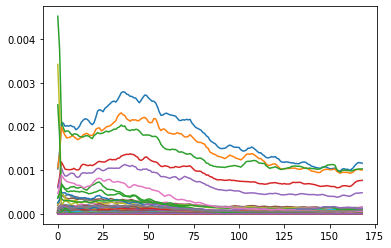

['girl', 'girls', 'guys', 'friends', 'friend', 'chick', 'boyfriend', 'community', 'chicks', 'mate', 'target', 'buddy', 'afc', 'player', 'master', 'hb8', 'leader', 'crowd', 'players', 'band', 'hb9', 'hb7', 'buddies', 'artist', 'mates', 'puas', 'roommate', 'amog', 'newbie', 'targets', 'lover', 'eachother', 'masters', 'wingman', 'bartender', 'stripper', 'artists', 'strippers', 'hb10', 'babe', 'hb6', 'freshman', 'chump', 'beginner', 'doc', 'dj', 'fellas', 'fools', 'waitress', 'instructor', 'hbs', 'pimp', 'guest', 'prick', 'dancer', 'instructors', 'hotties', 'newbies', 'noone', 'angel', 'geek', 'comedian', 'rockstar', 'hottie', 'bum', 'stalker', 'caveman', 'musician', 'milf', 'bouncer', 'naturals', 'singer', 'blondes', 'beginners', 'noob', 'lads', 'messenger', 'gals', 'guru', 'afcs', 'bartenders', 'sis', 'jackass', 'protector', 'dork', 'champ', 'photographer', 'waiter', 'cutie', 'ninja', 'brat', 'chode', 'babes', 'twins', 'jedi', 'gurus', 'buyer', 'bouncers', 'buyers', 'waitresses', 'hb5', 

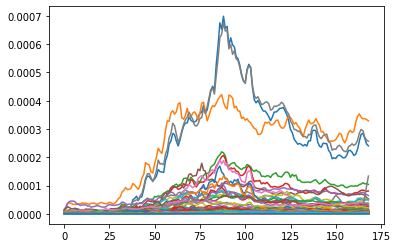

['feminists', 'child', 'victim', 'victims', 'individual', 'troll', 'mra', 'parent', 'lawyer', 'fathers', 'mrm', 'mras', 'individuals', 'rapist', 'rapists', 'author', 'sir', 'trolls', 'misogynist', 'spouse', 'attorney', 'atheist', 'dads', 'infant', 'activists', 'accuser', 'foreigners', 'jury', 'haters', 'tourists', 'writers', 'abusers', 'locals', 'perpetrators', 'misogynists', 'abuser', 'researchers', 'authors', 'congress', 'foreigner', 'pedophiles', 'opponent', 'gamers', 'accusers', 'atheists', 'bigot', 'russians', 'perpetrator', 'participants', 'subscribers', 'infants', 'extremists', 'opponents', 'redditors', 'prisoners', 'scumbag', 'counselor', 'redditor', 'homosexuals', 'academics', 'bigots', 'prosecutor', 'survivors', 'minors', 'defendant', 'commenters', 'aggressor', 'latinas', 'spouses', 'editor', 'attacker', 'douchebags', 'introverts', 'newborn', 'prosecutors', 'oppressors', 'radicals', 'crazies', 'inmates', 'faculty', 'creeper', 'libertarians', 'nanny', 'breadwinner', 'canadians

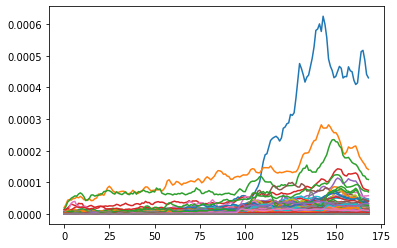

['mgtow', 'females', 'virgin', 'whore', 'whores', 'sjw', 'mods', 'jews', 'whites', 'slave', 'users', 'virgins', 'retard', 'losers', 'muslims', 'monk', 'slaves', 'prostitutes', 'sjws', 'prostitute', 'escort', 'orbiter', 'bully', 'liberals', 'hookers', 'escorts', 'indians', 'mgtows', 'hooker', 'followers', 'nazis', 'jew', 'bullies', 'morons', 'millionaire', 'ancestors', 'tranny', 'fuckers', 'leftists', 'billionaire', 'arabs', 'thug', 'psychopath', 'terrorists', 'pedo', 'therapists', 'refugees', 'jb', 'narcissist', 'elites', 'creator', 'shooter', 'psychopaths', 'hypocrites', 'africans', 'wizard', 'niggers', 'millennials', 'communists', 'migrants', 'lurkers', 'narcissists', 'tradcons', 'monks', 'socialists', 'dipshit', 'hermit', 'romans', 'emperor', 'globalists', 'prophet', 'surgeons', 'billionaires', 'rappers', 'creators', 'jbs', 'traitor', 'fuckboy', 'sahm', 'nationalists', 'savior', 'peasant', 'pedos', 'mghow', 'vegans', 'peasants', 'youtubers', 'capitalists', 'dems', 'beggars', 'invade

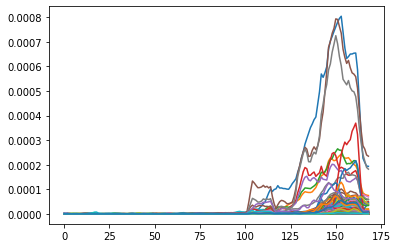

['chad', 'cuck', 'chads', 'normies', 'normie', 'stacy', 'simp', 'simps', 'tyrone', 'nigga', 'thots', 'boyo', 'stacies', 'ethnics', 'truecel', 'chadlite', 'femcel', 'landwhale', 'curries', 'cucktears', 'gangbanger', 'subhumans', 'autist', 'trannies', 'boomers', 'soyboy', 'npc', 'stacey', 'becky', 'degenerates', 'moids', 'boyos', 'norman', 'antifa', 'gigachad', 'soyboys', 'niggas', 'sexbots', 'normans', 'autists', 'janitor', 'chadlites', 'numales', 'tyrones', 'chang', 'niceguys', 'stacys', 'wymyn', 'oldcel', 'npcs', 'gymcels', 'wahmen', 'khhv', 'sexbot', 'neets', 'libtards', 'tradcucks', 'larper', 'noodlewhores', 'larpers', 'commies', 'staceys', 'tradcuck', 'fuckboys', 'uggo', 'jockcel', 'oldcels', 'khv', 'tallfag', 'slav', 'stacie', 'pajeet', 'weebs', 'noodlewhore', 'chadpreet', 'youngcels', 'aryans', 'ethnicels', 'spergs', 'pakis', 'gigachads', 'infiltrator', 'hikikomori', 'femails', 'wamen', 'beckies', 'whamen', 'poorcel', 'brigaders', 'rapefugees', 'dickcel', 'escortcels', 'edgelord'

In [26]:
k = 6
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)

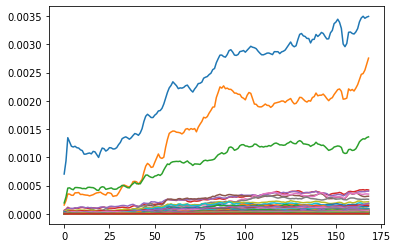

['women', 'men', 'woman', 'kids', 'family', 'children', 'wife', 'op', 'mother', 'father', 'males', 'husband', 'police', 'dad', 'partner', 'population', 'bitches', 'humans', 'daughter', 'adult', 'partners', 'mothers', 'sluts', 'wives', 'babies', 'minority', 'cops', 'families', 'user', 'idiots', 'americans', 'blacks', 'assholes', 'adults', 'president', 'enemy', 'husbands', 'provider', 'doctors', 'therapist', 'asians', 'teen', 'sons', 'moms', 'captain', 'teens', 'politicians', 'leaders', 'daughters', 'prostitutes', 'moron', 'peers', 'lawyers', 'employees', 'officer', 'household', 'offspring', 'teenager', 'liberals', 'coworkers', 'judges', 'citizens', 'criminals', 'soldiers', 'engineer', 'gays', 'employee', 'pussies', 'enemies', 'minorities', 'tribe', 'ceo', 'christians', 'scientists', 'teenagers', 'mommy', 'conservatives', 'employer', 'introvert', 'officers', 'masses', 'owners', 'athletes', 'citizen', 'democrats', 'relatives', 'millionaire', 'pedophile', 'europeans', 'supporters', 'republ

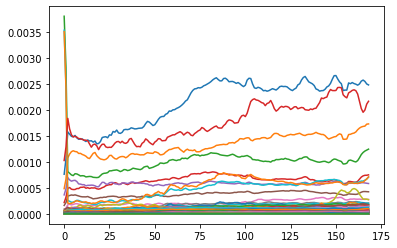

['people', 'man', 'someone', 'person', 'everyone', 'others', 'bitch', 'parents', 'bro', 'kid', 'boys', 'boy', 'nobody', 'mom', 'baby', 'brother', 'dudes', 'son', 'asshole', 'slut', 'idiot', 'somebody', 'team', 'students', 'loser', 'doctor', 'lady', 'teacher', 'boss', 'brothers', 'teachers', 'king', 'folks', 'couples', 'daddy', 'creep', 'sir', 'audience', 'mod', 'hero', 'nerd', 'manager', 'driver', 'cop', 'staff', 'princess', 'professor', 'lord', 'queen', 'owner', 'genius', 'patient', 'bros', 'host', 'writer', 'uncle', 'dumbass', 'celebrity', 'gentlemen', 'lesbians', 'liar', 'mum', 'clown', 'clients', 'actor', 'winner', 'devil', 'fans', 'coworker', 'gods', 'actors', 'prince', 'nerds', 'client', 'motherfucker', 'fucker', 'nurse', 'gamer', 'celebrities', 'acquaintances', 'readers', 'alcoholic', 'reader', 'fiance', 'colleagues', 'psychologist', 'exes', 'director', 'neighbor', 'cousins', 'grandma', 'grandmother', 'speaker', 'athlete', 'sucker', 'scientist', 'professionals', 'admin', 'server

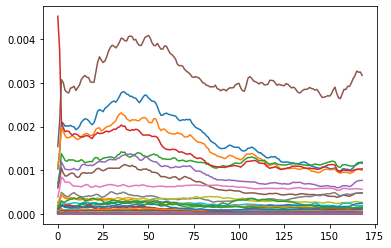

['girl', 'girls', 'guy', 'guys', 'friends', 'friend', 'anyone', 'dude', 'group', 'girlfriend', 'ex', 'chick', 'boyfriend', 'mate', 'sister', 'buddy', 'everybody', 'anybody', 'ladies', 'player', 'girlfriends', 'master', 'strangers', 'leader', 'crowd', 'jerk', 'stranger', 'fool', 'band', 'boyfriends', 'cousin', 'expert', 'roommate', 'peoples', 'sisters', 'customers', 'customer', 'coach', 'lover', 'douche', 'gentleman', 'crew', 'artists', 'freshman', 'experts', 'beginner', 'chief', 'roommates', 'fools', 'douchebag', 'weirdo', 'guest', 'gal', 'prick', 'trainer', 'lovers', 'mentor', 'noone', 'angel', 'pal', 'cashier', 'comedian', 'jerks', 'bum', 'gambler', 'caveman', 'musician', 'milf', 'moderator', 'singer', 'blondes', 'beginners', 'coaches', 'lads', 'gals', 'stud', 'sweetheart', 'salesman', 'sis', 'jackass', 'pervert', 'bloke', 'champ', 'singles', 'sweetie', 'photographer', 'waiter', 'cutie', 'ninja', 'brat', 'chef', 'twins', 'listener', 'sophomore', 'creeper', 'joker', 'keeper', 'smoker'

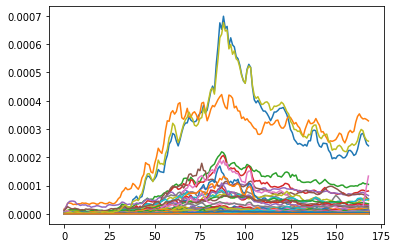

['feminists', 'child', 'victim', 'victims', 'individual', 'troll', 'mra', 'parent', 'lawyer', 'fathers', 'mrm', 'mras', 'individuals', 'rapist', 'rapists', 'author', 'trolls', 'misogynist', 'spouse', 'attorney', 'atheist', 'dads', 'infant', 'activists', 'accuser', 'foreigners', 'jury', 'haters', 'tourists', 'writers', 'abusers', 'locals', 'perpetrators', 'misogynists', 'abuser', 'researchers', 'authors', 'congress', 'foreigner', 'pedophiles', 'opponent', 'gamers', 'accusers', 'atheists', 'bigot', 'russians', 'perpetrator', 'subscribers', 'infants', 'extremists', 'opponents', 'redditors', 'prisoners', 'scumbag', 'redditor', 'homosexuals', 'academics', 'bigots', 'prosecutor', 'survivors', 'minors', 'defendant', 'commenters', 'aggressor', 'spouses', 'editor', 'attacker', 'douchebags', 'introverts', 'newborn', 'prosecutors', 'oppressors', 'radicals', 'crazies', 'inmates', 'faculty', 'libertarians', 'nanny', 'breadwinner', 'canadians', 'applicants', 'blogger', 'hipsters', 'radfems', 'vp', '

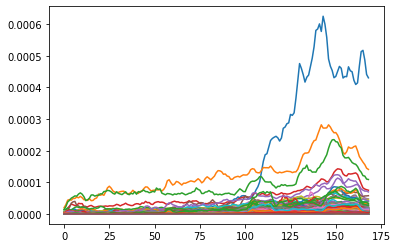

['mgtow', 'females', 'virgin', 'whore', 'whores', 'mods', 'jews', 'whites', 'slave', 'users', 'virgins', 'retard', 'losers', 'muslims', 'monk', 'slaves', 'prostitute', 'escort', 'orbiter', 'bully', 'hookers', 'escorts', 'indians', 'mgtows', 'hooker', 'followers', 'nazis', 'jew', 'bullies', 'morons', 'ancestors', 'tranny', 'fuckers', 'leftists', 'billionaire', 'thug', 'terrorists', 'pedo', 'therapists', 'narcissist', 'creator', 'shooter', 'psychopaths', 'boomers', 'hypocrites', 'wizard', 'millennials', 'communists', 'lurkers', 'narcissists', 'tradcons', 'monks', 'socialists', 'dipshit', 'hermit', 'emperor', 'globalists', 'prophet', 'billionaires', 'rappers', 'creators', 'traitor', 'fuckboy', 'nationalists', 'savior', 'pedos', 'vegans', 'peasants', 'youtubers', 'dems', 'beggars', 'invaders', 'kv', 'fascists', 'traitors', 'fatass', 'millenials', 'witches', 'brethren', 'imbecile', 'outcasts', 'savages', 'electrician', 'amish', 'dumbasses', 'lefties', 'goddesses', 'grandkids', 'cuckolds', '

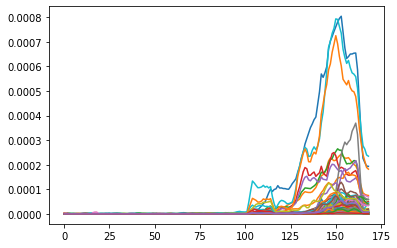

['chad', 'cuck', 'chads', 'normies', 'normie', 'stacy', 'simp', 'simps', 'tyrone', 'nigga', 'thots', 'boyo', 'stacies', 'ethnics', 'truecel', 'chadlite', 'femcel', 'landwhale', 'curries', 'cucktears', 'gangbanger', 'subhumans', 'autist', 'trannies', 'soyboy', 'npc', 'stacey', 'becky', 'degenerates', 'moids', 'boyos', 'norman', 'antifa', 'gigachad', 'soyboys', 'niggas', 'sexbots', 'normans', 'autists', 'janitor', 'chadlites', 'numales', 'tyrones', 'chang', 'niceguys', 'stacys', 'wymyn', 'oldcel', 'npcs', 'gymcels', 'wahmen', 'khhv', 'sexbot', 'neets', 'libtards', 'tradcucks', 'larper', 'noodlewhores', 'larpers', 'staceys', 'tradcuck', 'uggo', 'jockcel', 'oldcels', 'khv', 'tallfag', 'slav', 'stacie', 'pajeet', 'weebs', 'noodlewhore', 'chadpreet', 'youngcels', 'aryans', 'ethnicels', 'spergs', 'pakis', 'gigachads', 'infiltrator', 'femails', 'wamen', 'beckies', 'whamen', 'poorcel', 'brigaders', 'rapefugees', 'dickcel', 'escortcels', 'edgelord', 'infiltrators', 'wahmyn', 'bucko', 'changs', '

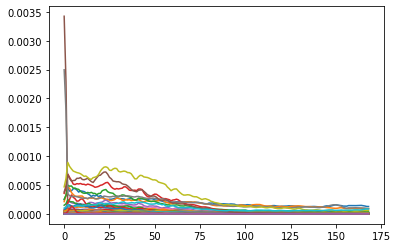

['community', 'chicks', 'target', 'afc', 'hb8', 'players', 'hb9', 'hb7', 'buddies', 'artist', 'mates', 'puas', 'amog', 'newbie', 'targets', 'eachother', 'masters', 'wingman', 'bartender', 'stripper', 'strippers', 'hb10', 'babe', 'hb6', 'chump', 'doc', 'dj', 'fellas', 'waitress', 'instructor', 'hbs', 'pimp', 'dancer', 'instructors', 'hotties', 'newbies', 'geek', 'rockstar', 'hottie', 'stalker', 'bouncer', 'naturals', 'noob', 'messenger', 'guru', 'afcs', 'bartenders', 'protector', 'dork', 'chode', 'babes', 'jedi', 'gurus', 'buyer', 'bouncers', 'buyers', 'waitresses', 'hb5', 'chumps', 'dancers', 'wingmen', 'fella', 'everyones', 'amogs', 'badboy', 'chic', 'mpua', 'wuss', 'buds', 'nun', 'promoter', 'pals', 'casanova', 'roomate', 'magician', 'newb', 'celeb', 'amigo', 'rockstars', 'stylist', 'hostess', 'manipulator', 'seducer', 'entourage', 'swingers', 'chics', 'superstar', 'pirates', 'designers', 'entertainer', 'jester', 'rafc', 'performer', 'hb4', 'chodes', 'hairdresser', 'stalkers', 'smart

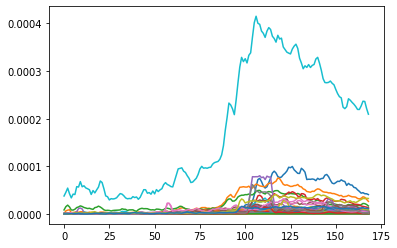

['sjw', 'betas', 'alphas', 'sjws', 'slayer', 'immigrants', 'manginas', 'arabs', 'refugees', 'jb', 'elites', 'fas', 'warriors', 'journalists', 'niggers', 'slayers', 'progressives', 'migrants', 'shitlord', 'redpillers', 'marxists', 'surgeons', 'jbs', 'sahm', 'widows', 'mghow', 'vikings', 'bluepillers', 'sloots', 'omegas', 'illegals', 'redpiller', 'trpers', 'sloot', 'barbarians', 'hackers', 'captains', 'rpers', 'oligarchs', 'mps', 'shitlords', 'saudis', 'islamists', 'ethniks', 'pakistanis', 'ashkenazi', 'sigmas', 'nominee', 'spinsters', 'wasps', 'nordics', 'schlub', 'serfs', 'stoics', 'infidels', 'neurotypicals', 'hubs', 'concubines', 'weemins', 'bluepiller', 'kurds', 'coders', 'sluthaters', 'revolutionaries', 'negroes', 'syrians', 'hostages', 'powerlifters', 'jailbaits', 'trps', 'trper', 'tradesmen', 'endocrinologist', 'gammas', 'clans', 'freemasons', 'infidel', 'masons', 'anglos', 'laydeez', 'jihadists', 'authoritarians', 'successor', 'orthodontist', 'meninist', 'tradesman', 'neocons', 

In [27]:
k = 8
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)

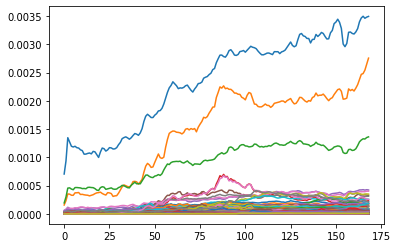

['women', 'men', 'woman', 'feminists', 'kids', 'child', 'family', 'children', 'wife', 'op', 'mother', 'father', 'females', 'males', 'nobody', 'husband', 'police', 'dad', 'victim', 'partner', 'victims', 'population', 'bitches', 'individual', 'humans', 'troll', 'daughter', 'adult', 'mra', 'partners', 'mothers', 'parent', 'lawyer', 'fathers', 'sluts', 'wives', 'mrm', 'babies', 'mras', 'minority', 'cops', 'families', 'individuals', 'mods', 'rapist', 'user', 'betas', 'idiots', 'teachers', 'slave', 'rapists', 'users', 'americans', 'blacks', 'couples', 'assholes', 'adults', 'president', 'losers', 'enemy', 'husbands', 'provider', 'doctors', 'muslims', 'therapist', 'asians', 'alphas', 'trolls', 'slaves', 'teen', 'misogynist', 'sons', 'moms', 'captain', 'teens', 'politicians', 'leaders', 'daughters', 'prostitutes', 'moron', 'peers', 'lawyers', 'prostitute', 'employees', 'lord', 'officer', 'household', 'offspring', 'orbiter', 'teenager', 'liberals', 'hookers', 'coworkers', 'judges', 'citizens', '

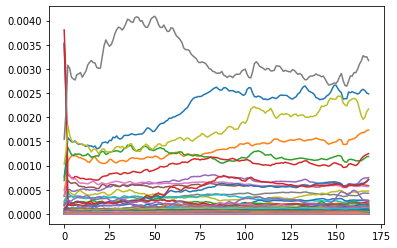

['people', 'man', 'guy', 'someone', 'person', 'everyone', 'anyone', 'others', 'dude', 'group', 'bitch', 'parents', 'girlfriend', 'ex', 'bro', 'kid', 'boys', 'boy', 'mom', 'baby', 'brother', 'dudes', 'son', 'asshole', 'slut', 'idiot', 'somebody', 'everybody', 'team', 'students', 'loser', 'doctor', 'lady', 'ladies', 'teacher', 'boss', 'girlfriends', 'strangers', 'brothers', 'king', 'author', 'folks', 'jerk', 'stranger', 'daddy', 'fool', 'creep', 'sir', 'boyfriends', 'audience', 'mod', 'hero', 'nerd', 'manager', 'driver', 'cop', 'staff', 'expert', 'princess', 'professor', 'peoples', 'sisters', 'queen', 'owner', 'genius', 'patient', 'bros', 'customers', 'host', 'writer', 'uncle', 'coach', 'dumbass', 'douche', 'celebrity', 'gentlemen', 'lesbians', 'liar', 'mum', 'clown', 'clients', 'gentleman', 'dads', 'actor', 'crew', 'winner', 'devil', 'gods', 'actors', 'prince', 'nerds', 'client', 'foreigners', 'motherfucker', 'fucker', 'haters', 'nurse', 'gamer', 'celebrities', 'acquaintances', 'readers

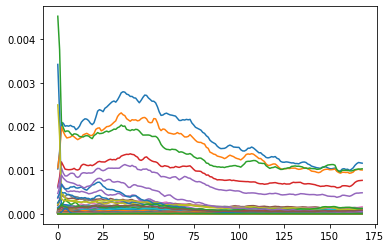

['girl', 'girls', 'guys', 'friends', 'friend', 'chick', 'boyfriend', 'community', 'chicks', 'mate', 'target', 'sister', 'buddy', 'anybody', 'afc', 'player', 'master', 'hb8', 'leader', 'crowd', 'players', 'band', 'hb9', 'hb7', 'buddies', 'artist', 'mates', 'cousin', 'puas', 'roommate', 'amog', 'customer', 'newbie', 'targets', 'lover', 'eachother', 'masters', 'wingman', 'bartender', 'stripper', 'artists', 'strippers', 'hb10', 'babe', 'hb6', 'freshman', 'chump', 'beginner', 'doc', 'dj', 'fellas', 'fools', 'waitress', 'instructor', 'hbs', 'pimp', 'guest', 'prick', 'dancer', 'instructors', 'hotties', 'newbies', 'noone', 'angel', 'pal', 'geek', 'comedian', 'rockstar', 'hottie', 'bum', 'stalker', 'caveman', 'musician', 'milf', 'moderator', 'bouncer', 'naturals', 'singer', 'blondes', 'beginners', 'noob', 'lads', 'messenger', 'gals', 'guru', 'afcs', 'bartenders', 'sis', 'jackass', 'protector', 'dork', 'bloke', 'champ', 'photographer', 'waiter', 'cutie', 'ninja', 'brat', 'chef', 'chode', 'babes'

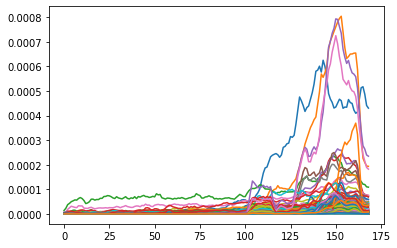

['mgtow', 'chad', 'virgin', 'cuck', 'chads', 'normies', 'whore', 'normie', 'whores', 'sjw', 'jews', 'whites', 'virgins', 'retard', 'stacy', 'monk', 'sjws', 'simp', 'escort', 'bully', 'simps', 'escorts', 'indians', 'tyrone', 'mgtows', 'nigga', 'thots', 'boyo', 'jew', 'bullies', 'stacies', 'ethnics', 'truecel', 'chadlite', 'femcel', 'tranny', 'landwhale', 'leftists', 'billionaire', 'curries', 'arabs', 'thug', 'pedo', 'therapists', 'refugees', 'cucktears', 'creator', 'gangbanger', 'shooter', 'subhumans', 'autist', 'trannies', 'boomers', 'soyboy', 'npc', 'stacey', 'becky', 'degenerates', 'millennials', 'moids', 'boyos', 'norman', 'migrants', 'antifa', 'lurkers', 'gigachad', 'soyboys', 'tradcons', 'niggas', 'monks', 'sexbots', 'normans', 'autists', 'janitor', 'chadlites', 'numales', 'globalists', 'prophet', 'tyrones', 'chang', 'niceguys', 'jbs', 'stacys', 'wymyn', 'oldcel', 'fuckboy', 'npcs', 'nationalists', 'pedos', 'vegans', 'youtubers', 'gymcels', 'dems', 'wahmen', 'invaders', 'kv', 'tra

In [29]:
k = 4
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)